In [1]:
#설치후 세션 다시시작
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.6 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
train_df = pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [47]:
train_df['기업가치(백억원)'] = pd.to_numeric(train_df['기업가치(백억원)'].astype(str).str[:4], errors='coerce').astype(float)
test_df['기업가치(백억원)'] = pd.to_numeric(test_df['기업가치(백억원)'].astype(str).str[:4], errors='coerce').astype(float)

In [48]:
train_df.head()

,ID,설립연도,국가,분야,투자단계,직원 수,인수여부,상장여부,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률
0,TRAIN_0000,2009,CT005,이커머스,Series A,4126.0,No,No,56.0,3365.0,4764.0,4.71,NaN,0.3
1,TRAIN_0001,2023,CT006,핀테크,Seed,4167.0,Yes,No,80.0,4069.0,279.0,1.00,2500.0,0.8
2,TRAIN_0002,2018,CT007,기술,Series A,3132.0,Yes,Yes,54.0,6453.0,12141.0,4.00,3500.0,0.5
3,TRAIN_0003,2016,CT006,NaN,Seed,3245.0,Yes,Yes,NaN,665.0,10547.0,2.97,NaN,0.7
4,TRAIN_0004,2020,CT002,에듀테크,Seed,1969.0,No,Yes,94.0,829.0,9810.0,1.00,1500.0,0.1


In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4376 non-null   object 
 1   설립연도            4376 non-null   int64  
 2   국가              4376 non-null   object 
 3   분야              3519 non-null   object 
 4   투자단계            4376 non-null   object 
 5   직원 수            4202 non-null   float64
 6   인수여부            4376 non-null   object 
 7   상장여부            4376 non-null   object 
 8   고객수(백만명)        3056 non-null   float64
 9   총 투자금(억원)       4376 non-null   float64
 10  연매출(억원)         4376 non-null   float64
 11  SNS 팔로워 수(백만명)  4376 non-null   float64
 12  기업가치(백억원)       3156 non-null   float64
 13  성공확률            4376 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 478.8+ KB


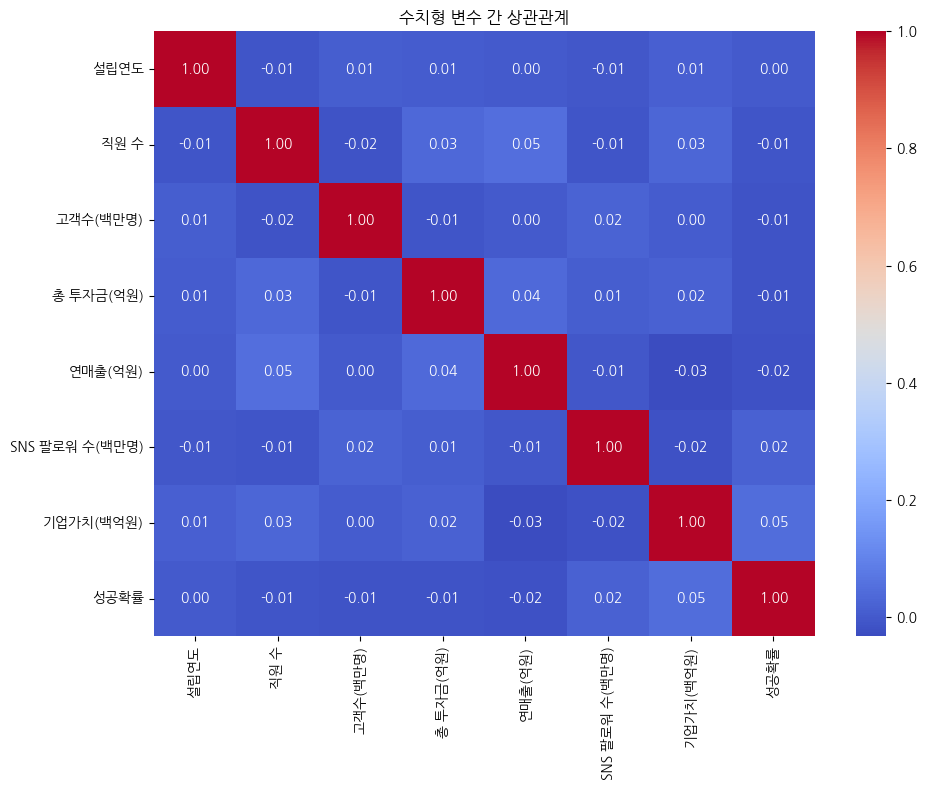

In [50]:
# 수치형 변수만 추출해서 상관관계 계산
numeric_cols = ['설립연도','직원 수', '고객수(백만명)', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)', '기업가치(백억원)', '성공확률']
correlation_matrix = train_df[numeric_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('수치형 변수 간 상관관계')
plt.tight_layout()
plt.show()

In [51]:
train_df.describe()

,설립연도,직원 수,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률
count,4376.000000,4202.000000,3056.000000,4376.000000,4376.000000,4376.000000,3156.000000,4376.000000
mean,2012.006856,2471.324369,49.214332,3314.568556,6452.202239,2.578103,3590.145754,0.537340
std,6.554872,1446.064215,27.141242,1880.103831,3782.792656,1.414590,1539.609469,0.241698
min,2001.000000,5.000000,1.000000,12.000000,12.000000,0.000000,1500.000000,0.100000
25%,2006.000000,1218.250000,27.000000,1651.500000,3094.250000,1.320000,2500.000000,0.400000
50%,2012.000000,2472.000000,49.000000,3398.000000,6478.500000,2.835000,3500.000000,0.600000
75%,2018.000000,3727.500000,72.000000,4908.250000,9692.500000,4.000000,4500.000000,0.700000
max,2023.000000,4998.000000,99.000000,7059.000000,14822.000000,5.000000,6000.000000,0.900000


In [52]:
train_df.isnull().sum()

,0
ID,0
설립연도,0
국가,0
분야,857
투자단계,0
직원 수,174
인수여부,0
상장여부,0
고객수(백만명),1320
총 투자금(억원),0


In [53]:
import numpy as np

# 분야: '미상'으로 채우기
train_df['분야'] = train_df['분야'].fillna('미상')
test_df['분야'] = test_df['분야'].fillna('미상')

# 직원 수: 중앙값으로 대체
median_staff = train_df['직원 수'].median()
train_df['직원 수'] = train_df['직원 수'].fillna(median_staff)
test_df['직원 수'] = test_df['직원 수'].fillna(median_staff)

# 고객수(백만명): 중앙값으로 대체
median_customers = train_df['고객수(백만명)'].median()
train_df['고객수(백만명)'] = train_df['고객수(백만명)'].fillna(median_customers)
test_df['고객수(백만명)'] = test_df['고객수(백만명)'].fillna(median_customers)

# 기업가치(백억원): 중앙값으로 대체
median_value = train_df['기업가치(백억원)'].median()
train_df['기업가치(백억원)'] = train_df['기업가치(백억원)'].fillna(median_value)
test_df['기업가치(백억원)'] = test_df['기업가치(백억원)'].fillna(median_value)

# 로그 변환 (log1p 사용)
for col in ['직원 수', '고객수(백만명)', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)', '기업가치(백억원)']:
    train_df[f'{col}'] = np.log1p(train_df[col])
    test_df[f'{col}'] = np.log1p(test_df[col])

In [54]:
from sklearn.preprocessing import LabelEncoder

# 설립연도 타입 변환 (int -> object)
train_df['설립연도'] =train_df['설립연도'].astype('object')
test_df['설립연도'] =test_df['설립연도'].astype('object')

category_features = ['설립연도','국가','분야','투자단계']
numeric_features = ['직원 수','고객수(백만명)','총 투자금(억원)','연매출(억원)','SNS 팔로워 수(백만명)', '기업가치(백억원)']
bool_features = ['인수여부','상장여부']

# LabelEncoder 객체를 각 범주형 feature별로 따로 저장하여 사용
encoders = {}

# 범주형 데이터를 encoding
for feature in category_features:
    encoders[feature] = LabelEncoder()
    train_df[feature] = encoders[feature].fit_transform(train_df[feature])
    test_df[feature] = encoders[feature].transform(test_df[feature])

# 불리언 값을 0과 1로 변환 ('Yes' → 1, 'No' → 0 으로 변환)
bool_map = {'Yes': 1, 'No': 0}

for feature in bool_features:
    train_df[feature] = train_df[feature].map(bool_map)
    test_df[feature] = test_df[feature].map(bool_map)

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 타겟 변수
target = '성공확률'

# 학습에 사용할 피처 (ID, 성공확률 제외)
features = [col for col in train_df.columns if col not in ['ID', target]]

# 문자열 컬럼 제거 (혹시 남아있다면)
X = train_df[features].select_dtypes(exclude='object')
y = train_df[target]

# 학습/검증 세트 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_val)
rmse = (mean_squared_error(y_val, y_pred))**0.5
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.2422
R²: -0.0148


In [66]:
import pandas as pd
import numpy as np

# 성공확률을 10개 구간으로 나눔
y_bins = pd.cut(y_val, bins=10)

# 각 구간별 빈도수 (0일 경우 1로 보정)
bin_counts = y_bins.value_counts().to_dict()

# 0으로 나누지 않도록 최소 1 보정
for k in bin_counts:
    if bin_counts[k] == 0:
        bin_counts[k] = 1

# 각 샘플에 대한 가중치 계산
weights = y_bins.map(lambda b: 1 / bin_counts.get(b, 1))  # 혹시 없는 bin 대비 대비책도 포함

# Weighted MAE 계산
abs_error = np.abs(y_val - y_pred)
weighted_mae = np.sum(weights * abs_error) / np.sum(weights)

print(f"Weighted MAE: {weighted_mae:.4f}")

Weighted MAE: 0.2094


In [67]:
# test 데이터에서 학습에 사용한 동일한 feature 추출
X_test = test_df[X.columns]  # X는 train_df에서 쓰인 최종 feature set

# 예측 수행
test_preds = model.predict(X_test)

# 제출용 데이터프레임 생성
submission = pd.DataFrame({
    'ID': test_df['ID'],
    '성공확률': test_preds
})

# 결과 저장
submission.to_csv('submission.csv', index=False)

print("✅ 제출 파일 'submission.csv' 생성 완료!")

✅ 제출 파일 'submission.csv' 생성 완료!
